<a href="https://colab.research.google.com/github/junjibea/2021-2-Interpark-review/blob/main/211219_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from tqdm import tqdm

In [ ]:
df = pd.read_csv('./review_total_all.5.0.7.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154097 entries, 0 to 154096
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    154097 non-null  object
 1   text     154097 non-null  object
 2   id       154097 non-null  object
 3   date     154097 non-null  object
 4   like     154097 non-null  int64 
 5   rate     154097 non-null  int64 
 6   place    154097 non-null  object
 7   season   154097 non-null  object
 8   cast     154097 non-null  object
 9   show     154097 non-null  object
 10  genre    154097 non-null  object
 11  body     154097 non-null  object
 12  leng     154097 non-null  int64 
 13  rig      154097 non-null  int64 
 14  live     154097 non-null  int64 
 15  subLive  154097 non-null  object
dtypes: int64(5), object(11)
memory usage: 18.8+ MB


## 결측치 처리

In [ ]:
idxB = df[df['body']=='missing'].index
idxS = df[df['subLive']=='missing'].index

for i in idxB:
    df['body'][i] = '[]'
for i in idxS:
    df['subLive'][i] = '[]'

<ipython-input-50-36b30e1cf598>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body'][i] = '[]'
<ipython-input-50-36b30e1cf598>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subLive'][i] = '[]'


## EDA

In [ ]:
#한글을 plot에 나타내기 위해 사용할 한글 폰트를 불러와서 적용
from matplotlib import font_manager,rc
import matplotlib
font_path='C:/Windows/Fonts/malgun.ttf' #폰트의 위치
font_name=font_manager.FontProperties(fname=font_path).get_name() #폰트의 이름
matplotlib.rc('font',family=font_name) #한글 폰트 적용

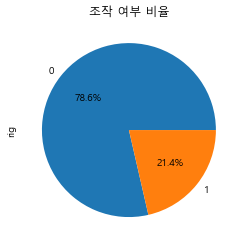

In [ ]:
df['rig'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='조작 여부 비율')

In [ ]:
df_rigT = df[df['rig']==True]
df_rigF = df[df['rig']==False]

#### 평점

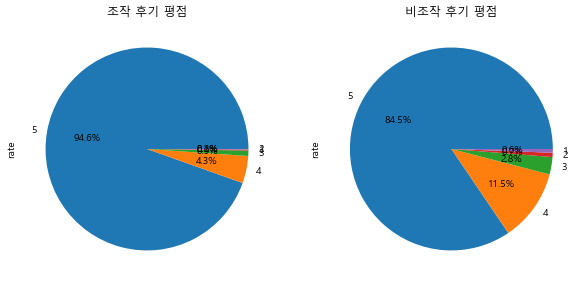

In [ ]:
#가로 10, 세로 5 인치의 백지 생성
plt.figure(figsize=(10,5))

#백지를 1행 2열 공간으로 나누고 첫번째 자리에 mentions 값에 따라 파이 차트를 그림
plt.subplot(1,2,1)
df_rigT['rate'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='조작 후기 평점')

plt.subplot(1,2,2)
df_rigF['rate'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='비조작 후기 평점')

In [ ]:
df_rigT[df_rigT['rate']<3].groupby('subLive').sum().sort_values(by='rig', ascending=False).head(15)
#별점 테러 보다는 올리려는 모습이 주로 발견됨

,like,rate,leng,rig,live
subLive,,,,,
뮤지컬 브라더스 까라마조프 뮤지컬 브라더스 까라마조프,0,15,427,13,0
비추 별로네요,0,8,112,8,8
실물 신분증 좀 그만 실물 신분증 좀 그만,0,4,90,4,0
[],0,3,37,3,0
김광석 노래 진짜 좋다 넘버는 넘나 취향,0,6,72,3,3
본인 신분증을 들고 가도 맞냐고 본인 명의 직접 찾음 신분증 문진표 다 확인시켜줬는데도 재차 붙잡고 본인이냐고 물어보는 이유가 무엇인가요 저는 다행히 마스크를 벗으라고 하는 일은 안 생겼지만 마스크 벗으라고 한다던데 왜 그러시는 건지,8,3,399,3,0
저는 좀 지루했어요 배우분들 연기나 노래는 좋았는데 글자체는 지루하고 어디서 많이 본듯한 장면들만 이어지는 느낌이라 앉아있기 힘들었네요,7,4,150,2,0
재밌게 봤습니다 재밌게 봤습니다,0,4,35,2,0
재밌어요 이번이 두 번째 관람이었는데 두 번부터는 극 자체에 대한 재미는 떨어져서 조금 아쉬웠어요 약간 예스러운 연출 때문에 지루함이 있네요 못하는 배우 한 명 말고는 나머지 배우들도 다 훌륭하고요 배우들 보러는 충분히 갈만합니다,0,4,260,2,0


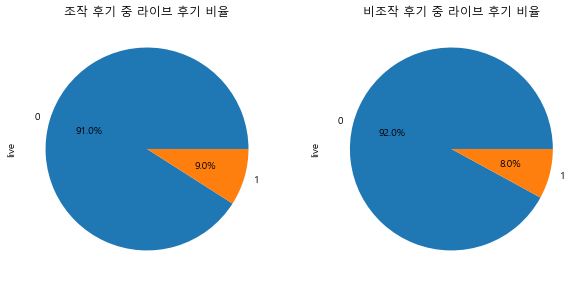

In [ ]:
#가로 10, 세로 5 인치의 백지 생성
plt.figure(figsize=(10,5))

#백지를 1행 2열 공간으로 나누고 첫번째 자리에 mentions 값에 따라 파이 차트를 그림
plt.subplot(1,2,1)
df_rigT['live'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='조작 후기 중 라이브 후기 비율')

plt.subplot(1,2,2)
df_rigF['live'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='비조작 후기 중 라이브 후기 비율')

In [ ]:
df[df['live']==1].groupby('subLive').sum().sort_values(by='live', ascending=False).head(15)

,like,rate,leng,rig,live
subLive,,,,,
좋아요 좋아요,12,505,1483,56,104
재밌어요 재밌어요,23,397,1413,43,81
아름답고 슬픈 극 추천합니다 기대 이상으로 몰입감 있고 슬픈 멜로 한편 본 거 같아요 넘버도 좋고 이정화 배우님 꾀꼬리 너무 황홀해요 의상과 무대도 너무 이뻐요,0,255,4717,51,51
마지막까지 행복했어요 블메포 덕에 행복했습니다 모두 고생 많으셨고 다음에 또 와주세요,0,225,2385,45,45
복화술의 신비함을 보고 왔습니다 너무 재미있었고 좋은 시간 보냈습니다 감사합니다 좋은 뮤지컬 많이 보여주세요 꿀 잼 허니잼 완전 짱짱,0,205,3403,41,41
엠마를 안아줄 수 있는 사람이 되고 싶어요 너무 슬퍼요 집 가면서 내내 울었습니다 어떻게 이래요,0,195,2613,39,39
재미있어요 재미있어요,0,190,700,22,38
현장을 좋아하지만 중계도 너무 잘 봤습니다 공백기가 느껴지지 않을 정도로 너무 노련하셨던 배우님들 너무 멋있고 재밌었습니다 빨리 호아센 달려가고 싶어졌습니다,0,175,3342,35,35
최고예요 배우들 한 명 한 명 너무 잘하시고 간간이 나오는 넘버도 좋아요,0,170,1496,34,34


In [ ]:
df[df['live']==1].groupby('subLive').sum().sort_values(by='live', ascending=False).tail(15)

,like,rate,leng,rig,live
subLive,,,,,
반드시 봄은 온다 지온홍규 오늘 삼일천하에서 기어이 봄은 올 거야 대사를 반드시 봄은 온다로 말했던 거 너무 좋았어요,0,5,74,0,1
반전 99 이 넘버에서 반전으로 뒤통수 제대로 맞고 입 떡 벌어졌 반전이 있다고 해서 일부러 내용 안 알아보고 봤는데 안 보길 진짜 잘한 것 같아요 입 떡 벌어지는 경험 오랜만이네요 피아노 한 대와 두 명의 배우만으로도 충분하다는 걸 느낀 날 피아노 소리 너무 좋았다 그 외에도 무대적인 요소 등 좋은 무대였어요 최재웅 배우님 김이 담 배우님 모두 대박이었어요 믿고 배,0,5,249,0,1
반전의 스토리 흥미진진하게 봤어요 여러 번 보면 더 재밌을 것 같아요,0,5,46,0,1
발레가 잘 어울리는 작품 무대연출이 환상적 원작 웹툰과 조금 다른 이야기지만 쉴 새 없이 바뀌는 무대연출과 발레가 어색하지 않은 공연 커튼콜 때는 발레를 한 무용수들에게 기립박수를 보내고 있었다,0,5,116,0,1
발작 최고 기범 스메르 발작 너무 좋아요 그 특유의 동작 너무 신기하고 멋져요,0,5,50,0,1
밝은 에너지가 좋았어요 마지막 곡이 특히 좋았습니다,0,5,35,0,1
밤바다의 별 선원들의 별,0,5,20,0,1
방금 보구나 옴아 연기 넘버 정말 미쳤어요 완전 취향 저격 회전 예약입니다,0,5,49,0,1
밤비 사관 너무 예뻐요 주문진 같은 미인 흔치 않아요,0,5,37,0,1


라이브 후기를 빈도수에 따라 정렬한 결과를 보면, '좋아요'나 '재밌어요'같은 후기를 제외한 나머지 상위 후기들은 대부분 조작 후기임을 확인할 수 있다. (live열은 빈도수, rig열은 그 중 조작 후기의 개수로 해석한다.) 따라서 라이브 후기 여부는 조작 후기를 판별하는 기준에 적합하지 않음을 알 수 있다. 공연 관계자들이 후기를 반복 작성한다고 해석할 수 있으려나??

In [ ]:
#'[]'는 기호만 쓰인 글
a = df_rigF.groupby('subLive').count().sort_values(by='title', ascending=False)
a.head(10)

,title,text,id,date,like,rate,place,season,cast,show,genre,body,leng,rig,live
subLive,,,,,,,,,,,,,,,
재밌어요 재밌어요,389,389,389,389,389,389,389,389,389,389,389,389,389,389,389
좋아요 좋아요,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279
잘 봤습니다 잘 봤습니다,230,230,230,230,230,230,230,230,230,230,230,230,230,230,230
[],175,175,175,175,175,175,175,175,175,175,175,175,175,175,175
재미있어요 재미있어요,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119
재밌었어요 재밌었어요,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107
좋았어요 좋았어요,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73
좋아요 재밌어요,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
추천합니다 추천합니다,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54


In [ ]:
b = df_rigT.groupby('subLive').count().sort_values(by='title', ascending=False)
b.head(10)

,title,text,id,date,like,rate,place,season,cast,show,genre,body,leng,rig,live
subLive,,,,,,,,,,,,,,,
[],618,618,618,618,618,618,618,618,618,618,618,618,618,618,618
좋아요 좋아요,586,586,586,586,586,586,586,586,586,586,586,586,586,586,586
재밌어요 재밌어요,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584
잘 봤습니다 잘 봤습니다,566,566,566,566,566,566,566,566,566,566,566,566,566,566,566
재미있어요 재미있어요,484,484,484,484,484,484,484,484,484,484,484,484,484,484,484
재밌었어요 재밌었어요,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202
좋았어요 좋았어요,183,183,183,183,183,183,183,183,183,183,183,183,183,183,183
재밌어요,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114
재밌어요 강추합니다,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105


조작 여부 비율이 8:2임을 고려하면 비슷한 내용의 평범한 후기이더라도 조작 후기에서 훨씬 자주 반복되고, 기호만으로 이루어진 의미 없는 후기를 굉장히 자주 작성하는 것으로 보인다

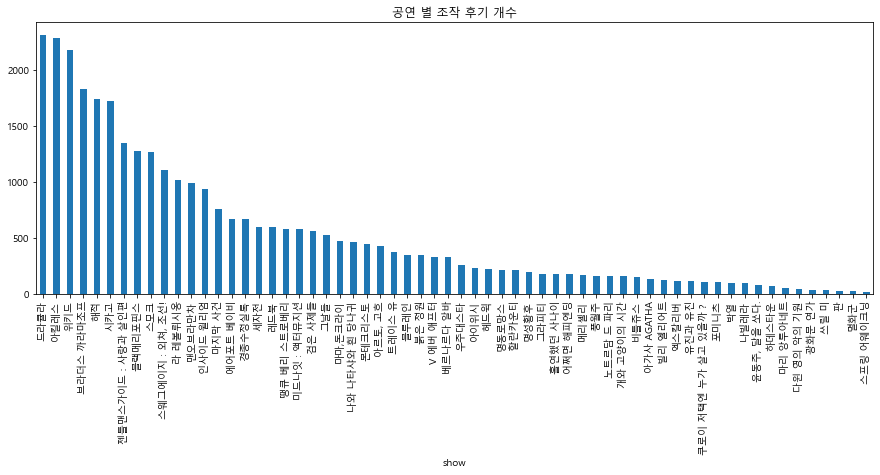

In [ ]:
rigShowCount = df_rigT.groupby('show').count().sort_values(by='rig',ascending=False)
rigShowCount['rig'].plot(kind='bar', figsize=(15,5), rot=90, title='공연 별 조작 후기 개수')

In [ ]:
rigRate = df.groupby(['show', 'rig']).count()
rigRate.reset_index(inplace = True)
rigRate

,show,rig,title,text,id,date,like,rate,place,season,cast,genre,body,leng,live,subLive
0,할란카운티,0,601,601,601,601,601,601,601,601,601,601,601,601,601,601
1,할란카운티,1,210,210,210,210,210,210,210,210,210,210,210,210,210,210
2,V 에버 애프터,0,2244,2244,2244,2244,2244,2244,2244,2244,2244,2244,2244,2244,2244,2244
3,V 에버 애프터,1,332,332,332,332,332,332,332,332,332,332,332,332,332,332
4,개와 고양이의 시간,0,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464,1464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,해적,1,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739,1739
120,헤드윅,0,3360,3360,3360,3360,3360,3360,3360,3360,3360,3360,3360,3360,3360,3360
121,헤드윅,1,221,221,221,221,221,221,221,221,221,221,221,221,221,221
122,홀연했던 사나이,0,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932,1932


In [ ]:
rate = []
sort = []
for i in range(0, len(rigRate), 2):
    cnt = rigRate['title'][i] + rigRate['title'][i+1]
    a = rigRate['title'][i]/cnt*100
    b = rigRate['title'][i+1]/cnt*100
    rate.append(a)
    rate.append(b)
    sort.append(b)
    sort.append(b)
rigRate['rate']=rate
rigRate['sort']=sort

In [ ]:
rigRate.sort_values(by='sort', ascending=False, inplace=True)

<BarContainer object of 62 artists>

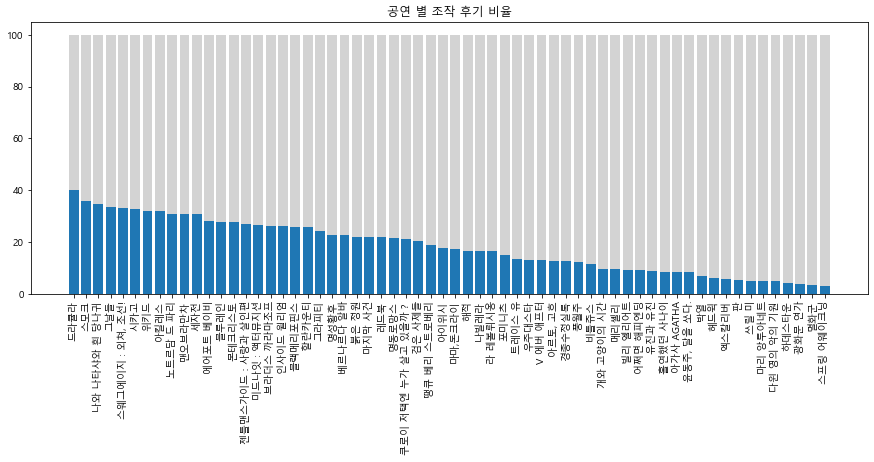

In [ ]:
fig = plt.figure(figsize=(15, 5))
ax = fig.subplots()
plt.xticks(rotation=90)
plt.title('공연 별 조작 후기 비율')
ax.bar(rigRate[rigRate['rig']==1]['show'],rigRate[rigRate['rig']==1]['rate'], label='True')
ax.bar(rigRate[rigRate['rig']==0]['show'],rigRate[rigRate['rig']==0]['rate'], bottom=rigRate[rigRate['rig']==1]['rate'], label='False', color='lightgrey')

애초에 인기공연 후기만 수집해서 큰 의미는 없나 싶지만? 뮤지컬 <드라큘라>, <아킬레스>, <위키드>의 조작 후기 개수가 가장 많고 비율로 따져보아도 모두 상위에 있음을 확인할 수 있다. 상위 공연들의 특별한 공통점은 보이지 않는다. 공통점이 있을 것도 같은데 분석할 열이 너무 부족해요ㅜㅜ

In [ ]:
T = df_rigT.subLive.unique()
F = df_rigF.subLive.unique()
T_sub_F = [x for x in T if x not in F]

In [ ]:
len(T)

6038

In [ ]:
len(F)

115197

In [ ]:
len(T_sub_F)

5382

In [ ]:
T_sub_F

['재밋서용 재밋서용 재밋서용 재밋서용재밋서용 재밋서용재밋서용 재밋서용',
 '하데스 타운 하데스 타운 진짜 진짜 진짜 너무 재미있어요 할인이 더 있었으면 좋겠습니다',
 '오늘도 최고였던  김선영 김우형 배우님 페어 정말 좋아요 진짜 최고인 것 같아요 배우님 두 분 붙는 날 다 갈래요 완전 짱',
 '또 보고 싶은 극 봐도 봐도 또 보고 싶은 극',
 '하데스를 망쳐버린 시우민 노래도 안돼 연기도 안돼 내가 왜 이 비싼 돈을 주고 봐야 하나 하는 생각을 처음 해봅니다 정작 몰입해야 할 시점에 실소를 금치 못할 노래와 연기를 보여 주네요 하데스를 제대로 말아 먹은이라 생각합니다 재능이 없으면 노력이라도 해야 되는데 노력조차 보이지 않는 시우민 정말 실망입니다 시우민의 너무나도 충격적인 발연기와 발 발성 덕분에 지금도 충격에서 헤어 나오지 못하네요 송스루 대사할 때는 장수원의 괜찮아요 가 연상이 됩니다 심각한 상황에 어쩔 수 없이 큭큭 거릴 수밖에 없는 발연기에 난감합니다 하필이면 가장 극적인 장면에 오르페우스가 등장하는데 한 마디로 산통을 다 깨더군요 어떻게 저런 실력으로 뮤지컬 무대에 오를 생각을 했는지 의문입니다 시우민은 거르세요',
 '오늘 길에 또 예매함 박광현 강홍석으로 봤는데 강홍석 님이 조절을 너무 잘해서 하나도 지루하지 않았습니다 또 볼게요',
 '시우민 오르페우스에 찰떡이에요 극이 너무 멋지고 배우들 연기랑 합이 굉장히 좋았어요 시우민 진짜 얼굴이 작고 귀엽더라고요 진짜 소년 같았어요 넘버랑 연기도 잘하고 오르페우스에 찰떡이더라고요',
 '재미있어요 최고의 뮤지컬',
 '하데스 타운 어슷 주세요',
 '하데스 타운 넘버 너무 좋아요',
 '또 예매하게 만드는 뮤지컬 하데스 저음 목소리 미쳤습니다',
 '하데스 타운 넘버 연출 취지예요',
 '재미있었어요 강추합니다',
 '하데스 타운 너무 재미있어요 스토리도 재미있어요 나중에 뉴욕 가면 또 보고 싶은 뮤지컬 시우민 너무 잘합니다',
 '하데스 타운 하데스 타운 좋은 후기만큼 인상 깊고 재밌었습니